<a href="https://colab.research.google.com/github/Matinnorouzi2023/Digital-Twin/blob/main/ML_WD_TrBn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Reading Data

In [3]:
df = pd.read_csv('Wind_turbine.csv')
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
def check_df(dataframe):
    print("##### shape ####")
    print(dataframe.shape)
    print("##### type ####")
    print(dataframe.dtypes)
    print("##### head3 ####")
    print(dataframe.head(3))
    print("##### tail3 ####")
    print(dataframe.tail(3))


check_df(df)

##### shape ####
(50530, 5)
##### type ####
Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object
##### head3 ####
          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
##### tail3 ####
              Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
50527  31 12 2018 23:30          2201.106934          8.435358   
50528  31 12 2018 23:40          2515.694092          9.421366   
50529  31 12 2018 23:50          282

In [5]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [6]:
df = df[df['LV ActivePower (kW)'] > 0]

df = df.dropna()

df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,39692.000000,39692.000000,39692.000000,39692.000000
mean,1664.751281,8.769781,1829.739672,115.532274
std,1264.303861,3.773594,1306.418817,86.276846
min,0.000200,1.208934,0.000000,0.000000
25%,481.681473,5.911951,595.684321,49.041458
50%,1394.047974,8.114283,1596.105035,70.241829
75%,2908.239746,11.099597,3306.484805,197.156849
max,3618.732910,25.206011,3600.000000,359.997589


# Data Visualization

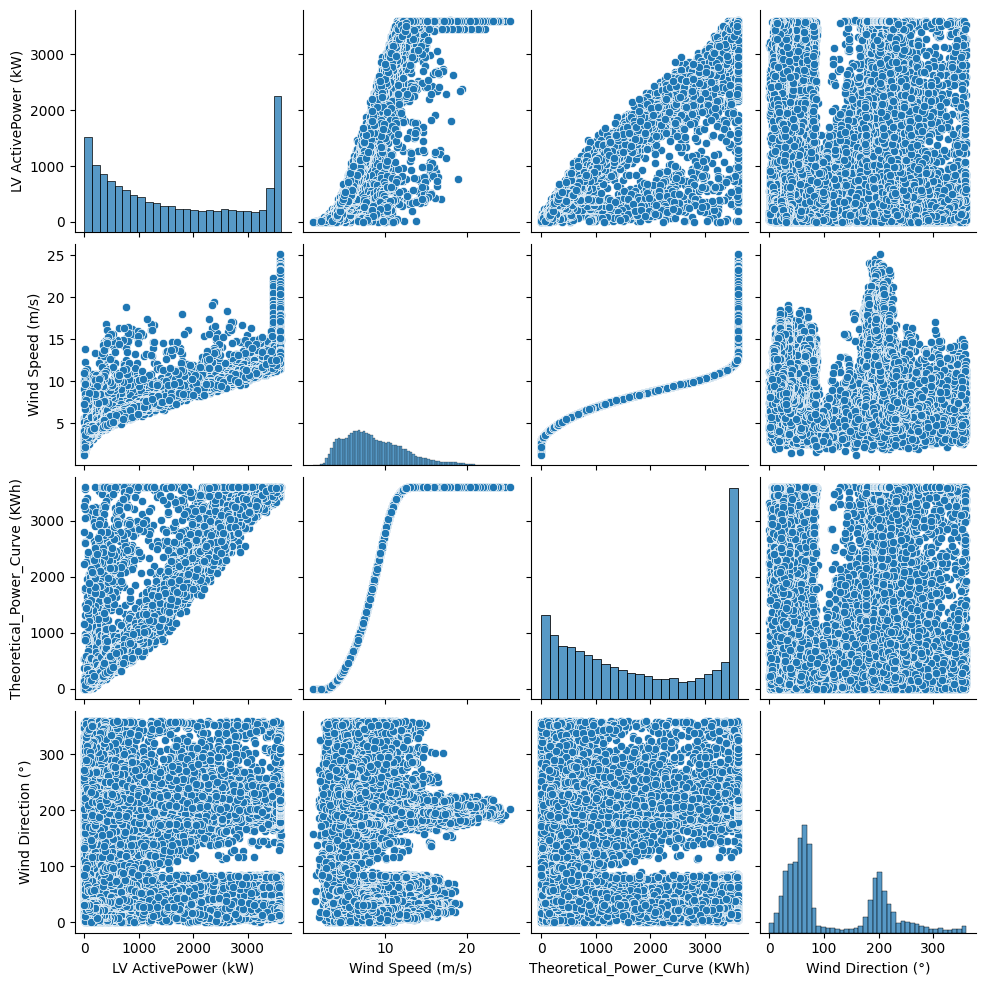

In [7]:
sns_plot = sns.pairplot(data = df, vars = ['LV ActivePower (kW)','Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)'])
sns_plot.figure.savefig("output.png")

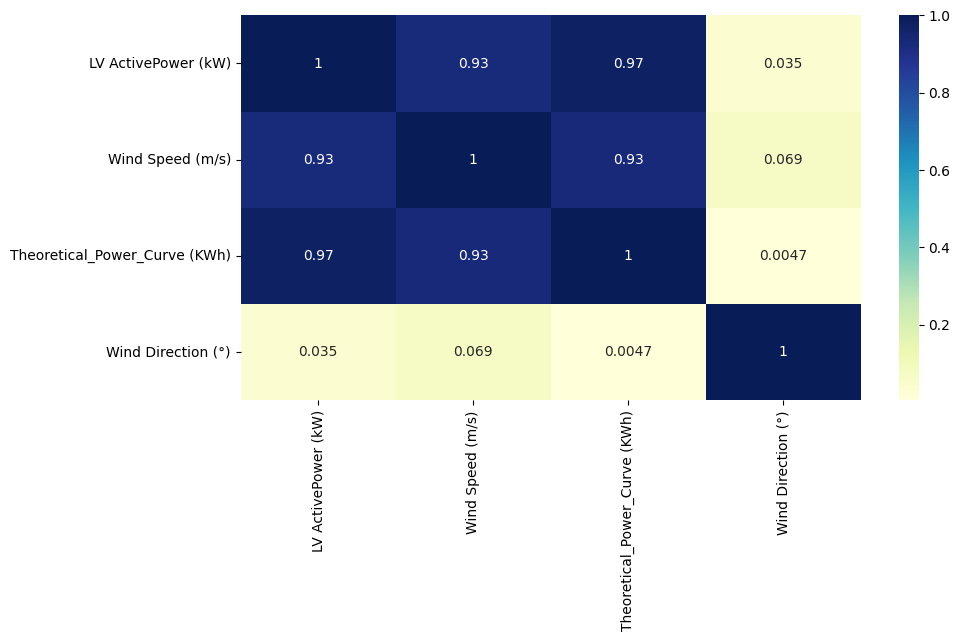

In [8]:
plt.figure(figsize = (10,5))
sns.heatmap(df.iloc[:,1:].corr(), cmap = 'YlGnBu', annot = True)
plt.show()

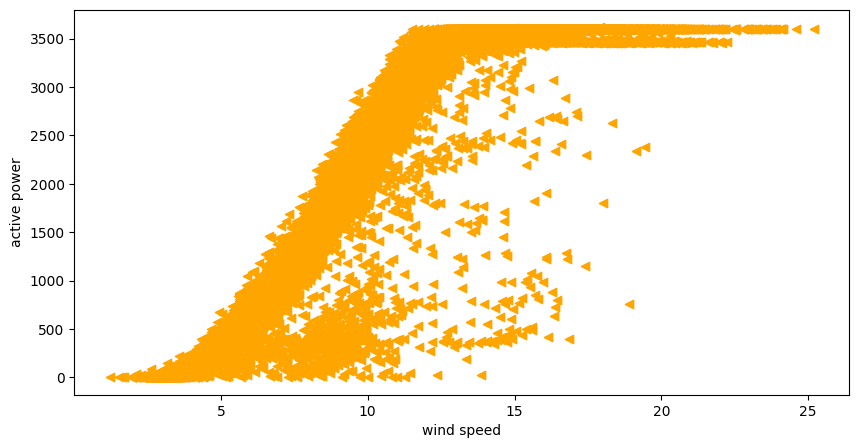

In [9]:
plt.figure(figsize = (10,5))
plt.scatter(df['Wind Speed (m/s)'],df['LV ActivePower (kW)'], color = 'orange', marker = '<')
plt.xlabel('wind speed')
plt.ylabel('active power')
plt.show()

# Data Preparation

In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

data_process = df[['Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']]
data_process = scaler.fit_transform(data_process)

print(type(data_process))
data_process[:5]

<class 'numpy.ndarray'>


array([[-0.91649717, -1.08191076,  1.67442896],
       [-0.82087605, -1.00261772,  1.77464493],
       [-0.94175173, -1.10137558,  1.82012324],
       [-0.82418663, -1.00551878,  1.8049776 ],
       [-0.84584616, -1.02421485,  1.74025721]])

In [11]:
from sklearn.model_selection import train_test_split

x = data_process
y = df['LV ActivePower (kW)']

xtrain, xtest, ytrain, ytest = train_test_split(x , y , train_size = 0.8, random_state = 10)
print('test properties', xtest.shape)
print('train properties', xtrain.shape)

test properties (7939, 3)
train properties (31753, 3)


# Modeling and Evaluation (Linear Regression)

In [12]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(xtrain, ytrain)

print("coefficients: ", model_1.coef_)
print("intercept: ", model_1.intercept_)
print("regression formula:", model_1.coef_[0], "*WS+",model_1.coef_[1], "*WD+",model_1.coef_[2], "*TPC+",model_1.intercept_)

coefficients:  [ 191.65868192 1053.39109615   26.13069168]
intercept:  1664.5353410209434
regression formula: 191.65868192224212 *WS+ 1053.3910961524025 *WD+ 26.13069167858574 *TPC+ 1664.5353410209434


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ypred = model_1.predict(xtest)

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print('mean_absolute_error=' , mae)
print('mean_squared_error=', mse)
print('r2_score=' , r2)

mean_absolute_error= 139.88800845978227
mean_squared_error= 73040.30155238695
r2_score= 0.9542695662830927


# Prediction (Linear Regression)

In [14]:
sample = {'Wind Speed (m/s)': [10.45, 8.55, 5, 3.5],'Wind Direction (°)': [225.12, 185.45, 150, 145],'Theoretical_Power_Curve (KWh)': [3500, 2840, 1200, 500]}

sdf = pd.DataFrame(sample)
sample_normal = scaler.fit_transform(sdf)


In [15]:
y_sample = model_1.predict(sample_normal)
y_sample[3]

369.5363073849735

Text(0, 0.5, 'predicted power')

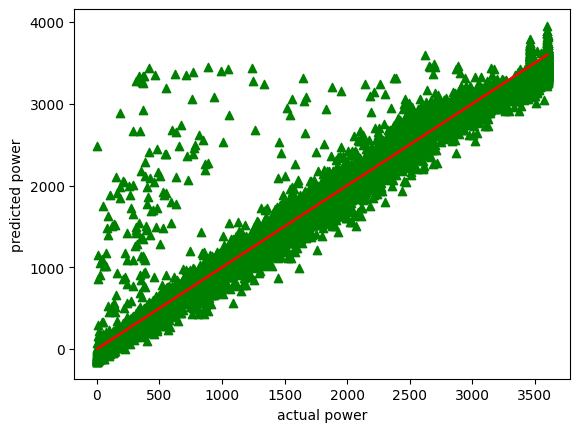

In [16]:
plt.scatter(ytest , ypred , color='Green' , marker='^')
plt.plot(ytest,ytest, color = 'Red')
plt.xlabel('actual power')
plt.ylabel('predicted power')

# Modeling and Evaluation (Elastic Net Regression)

In [17]:
from sklearn.linear_model import ElasticNet

model_2 = ElasticNet(alpha = 0.2, random_state = 0)
model_2.fit(xtrain, ytrain)
print("coefficients: ", model_2.coef_)
print("intercept: ", model_2.intercept_)

coefficients:  [419.63112555 764.8443917   10.52022588]
intercept:  1664.6355508296876


In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ypred2 = model_2.predict(xtest)

mae2 = mean_absolute_error(ytest, ypred2)
mse2 = mean_squared_error(ytest, ypred2)
r2_2 = r2_score(ytest, ypred2)

print('mean_absolute_error=' , mae2)
print('mean_squared_error=', mse2)
print('r2_score=' , r2_2)

mean_absolute_error= 176.0756151794515
mean_squared_error= 85801.0085752905
r2_score= 0.9462801049269779


# Modeling and Evaluation (K-Nearest_Neighbor Regression)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

model_3 = KNeighborsRegressor(n_neighbors = 25)
model_3.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=25)

In [20]:
ypred3 = model_3.predict(xtest)

mae3 = mean_absolute_error(ytest, ypred3)
mse3 = mean_squared_error(ytest, ypred3)
r2_3 = r2_score(ytest, ypred3)

print('mean_absolute_error=' , mae3)
print('mean_squared_error=', mse3)
print('r2_score=' , r2_3)

mean_absolute_error= 116.59861261065127
mean_squared_error= 63465.1405206816
r2_score= 0.9602645616155675


# Model Comparison

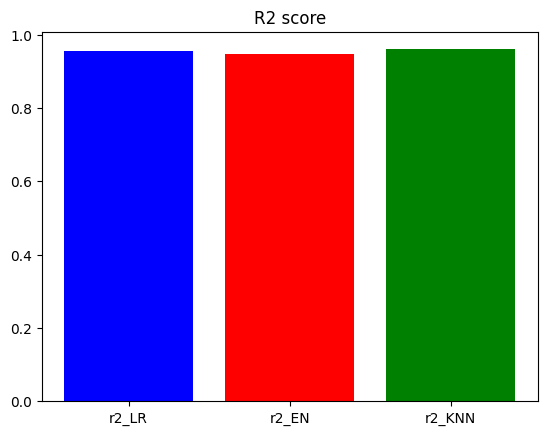

In [21]:
objects = ['r2_LR','r2_EN','r2_KNN']
performance = [r2, r2_2, r2_3]

plt.bar(objects, performance, color = ('blue','red','green'))
plt.title("R2 score")
plt.show()

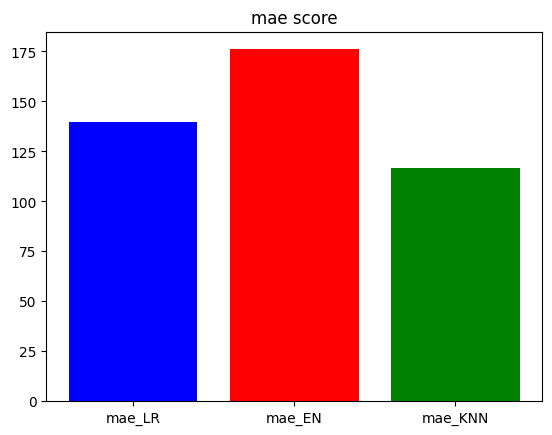

In [22]:
objects = ['mae_LR','mae_EN','mae_KNN']
performance = [mae, mae2, mae3]

plt.bar(objects, performance, color = ('blue','red','green'))
plt.title("mae score")
plt.show()

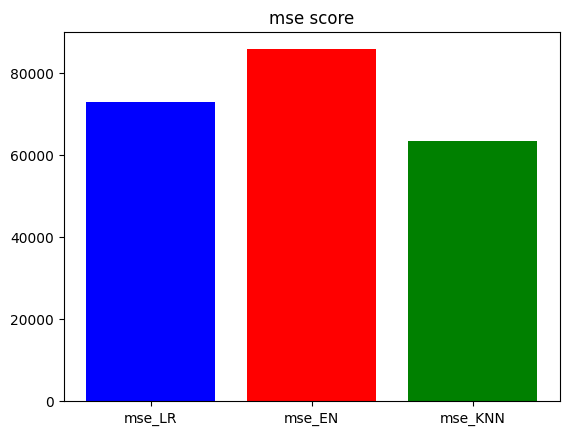

In [23]:
objects = ['mse_LR','mse_EN','mse_KNN']
performance = [mse, mse2, mse3]

plt.bar(objects, performance, color = ('blue','red','green'))
plt.title("mse score")
plt.show()